__This script explores the Implied TCR of SimMod by visualizing the T-F dependency. The observation-based data is shown as reference.__

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 15
import pandas as pd

In [8]:
forcing_file = '../data/preprocessed/forcing_ensemble_base1961-1990.npy'
temps_file = '../data/preprocessed/Observations_TAnom.csv'

#Import forcings and observed temperatures
forcings = np.load(forcing_file, allow_pickle=True).item()
annual_temps = pd.read_csv(temps_file, skiprows=10)

In [9]:
SIMMOD_PATH = "../../SimMod/results/"

SIMMOD_TAG_85 = "200828-112329-pulse_response-rcp85"
SIMMOD_TAG_60 = "200828-112347-pulse_response-rcp60"
SIMMOD_TAG_45 = "200828-112406-pulse_response-rcp45"
SIMMOD_TAG_26 = "200828-112429-pulse_response-rcp26"

# Read SimMod data
simmod85 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_85+"/results.csv")
simmod60 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_60+"/results.csv")
simmod45 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_45+"/results.csv")
simmod26 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_26+"/results.csv")

# Normalize temperature anomalies to (1961, 1990)
simmod85['t_s'] = simmod85['t_s']-simmod85[(simmod85['year']>1960)&(simmod85['year']<1991)]['t_s'].mean()
simmod60['t_s'] = simmod60['t_s']-simmod60[(simmod60['year']>1960)&(simmod60['year']<1991)]['t_s'].mean()
simmod45['t_s'] = simmod45['t_s']-simmod45[(simmod45['year']>1960)&(simmod45['year']<1991)]['t_s'].mean()
simmod26['t_s'] = simmod26['t_s']-simmod26[(simmod26['year']>1960)&(simmod26['year']<1991)]['t_s'].mean()

# Normalize forcings to (1961, 1990)
simmod85['total_forcing'] = (simmod85['total_forcing']
    -simmod85[(simmod85['year']>1960)&(simmod85['year']<1991)]['total_forcing'].mean())
simmod60['total_forcing'] = (simmod60['total_forcing']
    -simmod60[(simmod60['year']>1960)&(simmod60['year']<1991)]['total_forcing'].mean())
simmod45['total_forcing'] = (simmod45['total_forcing']
    -simmod45[(simmod45['year']>1960)&(simmod45['year']<1991)]['total_forcing'].mean())
simmod26['total_forcing'] = (simmod26['total_forcing']
    -simmod26[(simmod26['year']>1960)&(simmod26['year']<1991)]['total_forcing'].mean())

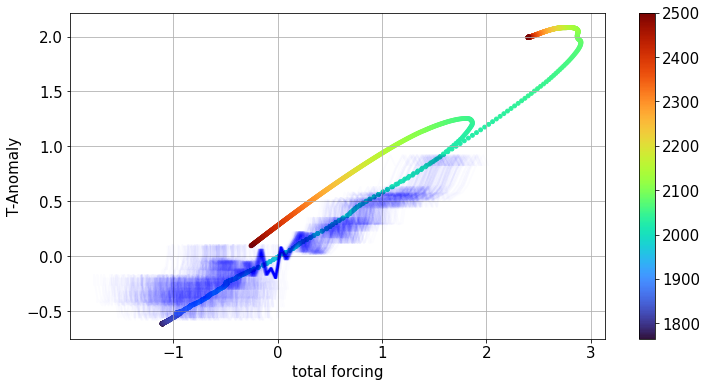

In [12]:
plt.subplots(figsize=(12,6))
for idx in range(200):
    shifted_forcing = (forcings['rf_anthro'][:,idx]
            - forcings['rf_anthro'][(forcings['year']>1960) & (forcings['year']<1991),idx].mean())
    forcing_plot = shifted_forcing[(forcings['year']>=1880)]
    plt.plot(forcing_plot,
             annual_temps['gistemp'][annual_temps['year']<2018],
             lw=2, alpha=0.01, c='b')

plt.scatter(simmod45['total_forcing'], simmod45['t_s'], c=simmod45['year'],
            s=15, cmap='turbo', label='4.5')   
plt.scatter(simmod26['total_forcing'], simmod26['t_s'], c=simmod26['year'],
            s=15, cmap='turbo', label='2.6')

plt.colorbar()
#plt.xlim(1850, 2020)
plt.grid()
plt.xlabel('total forcing')
plt.ylabel('T-Anomaly')
#plt.legend()
plt.show()